# Discussion Related with outliers and impact on machine learning

# which machine learning model are sensitive to outliers?
1. Naivye Bayes Classifier -- Not sensitive to outliers 
2. SVM -- Not sensitive to outliers 
3. Linear Regression --  sensitive to outliers 
4. Logistic Regression  --  sensitive to outliers 
5. Classification And Regression Decision Trees -- Not sensitive to outliers 
6. Ensemble ( Random Forest , Xg boost , Gradient Boosting) -- Not sensitive to outliers 
7. K Nearest Neighbour --   sensitive to outliers ( In knn , i will find the nearest point, when one outlier is present very far, based on the k value we will select the nearest neighbour )
8. Kmeans clustering  --   sensitive to outliers  
9. Hierarichal Clustering --  sensitive to outliers 
10. PCA --  sensitive to outliers 
11. Neural Networks -- sensitive to outliers ( if our dataset is imbalanced )

In [1]:
import pandas as pd
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df['Age'].isnull().sum()

177

In [3]:
# missing value removed with dropna
df.Age.dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_3352\1198480214.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age.dropna())


<Axes: xlabel='Age', ylabel='Density'>

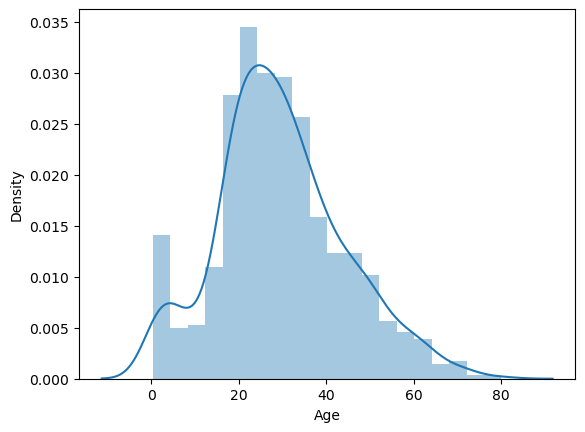

In [4]:
# Distribution with respect to age
import seaborn as sns
sns.distplot(df.Age.dropna())

C:\Users\HP\AppData\Local\Temp\ipykernel_1492\4200069810.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age.fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

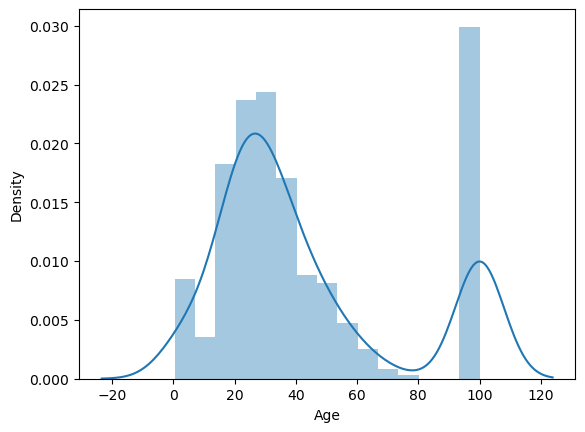

In [5]:
# Fill the null value with 100
sns.distplot(df.Age.fillna(100))

#  This data is Gaussian Distributed , we will try to remove the outliers( 3 standard deviation )

Text(0, 0.5, 'No of passengers ')

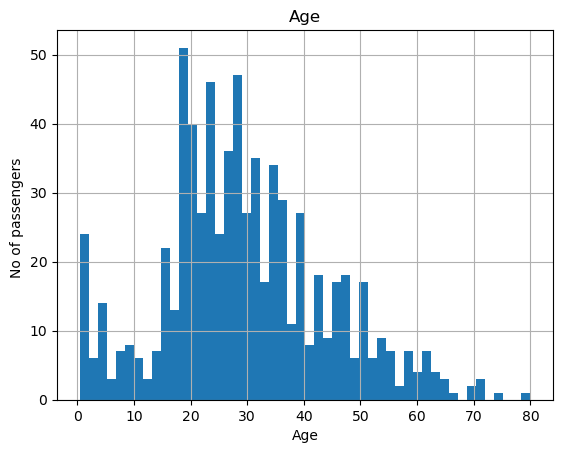

In [5]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers ')
# It almost look like a gaussian distribution

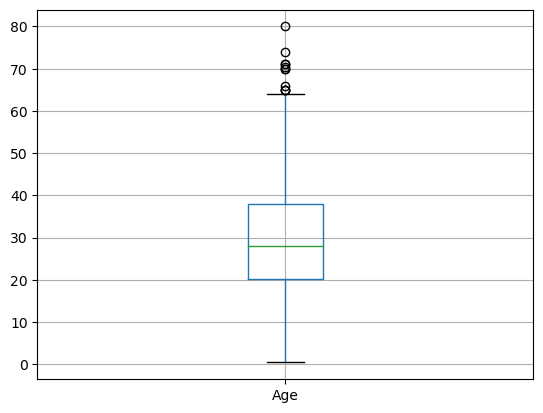

In [6]:
# Boxplot
figure=df.boxplot(column='Age')

In [7]:
# lets check the percentile 
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
# If the data is normally distributed we use this

In [9]:
## Assuming Age follows A Gaussian Distribution, we will calculate the boundaries which differentiates the outliers 
# After 3 rd standard deviation (right side)
# in 3std , 99.7% of data is covered
upper_boundary=df['Age'].mean()+3*df['Age'].std()
upper_boundary


73.27860964406095

In [10]:
# After 3 rd standard deviation (left  side)
lower_boundary=df['Age'].mean()-3*df['Age'].std()
lower_boundary
# in Age negative value will not be there

-13.88037434994331

In [11]:
df['Age'].mean()

29.69911764705882

In [12]:
# Lets compute the interquartile range to calculate the boundaries 
IQR=df.Age.quantile(.75)-df.Age.quantile(.25)


In [13]:
IQR

17.875

In [14]:
# Compute the lower and upper fence
lower_bridge=df['Age'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+(IQR*1.5)
# we have to use this to solve the problem

In [15]:
lower_bridge,upper_bridge
# Age cannot be negative 
# Outside this will be my outlier

(-6.6875, 64.8125)

In [16]:
# Calculate the extreme boundary / extreme corner (extreme outliers , multiply with 3)
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
lower_bridge,upper_bridge

(-33.5, 91.625)

# Feature is skewed (Fare), check the spread, more spread select it

Text(0, 0.5, 'No of Passenger')

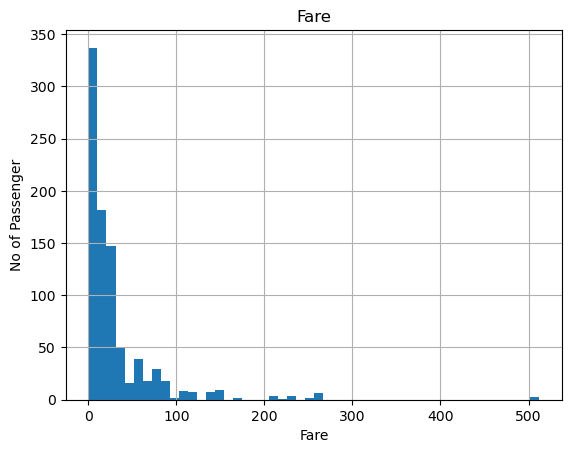

In [16]:
# histogram
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')
# It looks like right skewed dataset

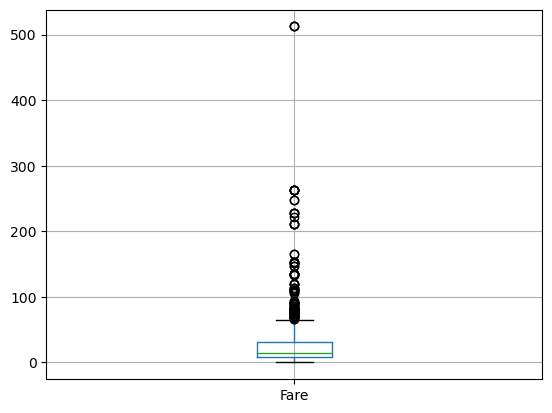

In [17]:
# Box plot 
figure=df.boxplot(column='Fare')
# It has lots of outlier

In [18]:
# Calculate the upper and lower boundaries
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
# Lets compute the interquartile range to calculate the boundaries 
IQR=df.Fare.quantile(.75)-df.Fare.quantile(.25)
IQR

23.0896

In [20]:
# Compute the lower and upper fence
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)

In [21]:
lower_bridge,upper_bridge
# outlier is only 65

(-26.724, 65.6344)

In [22]:
# Calculate the extreme boundary / extreme corner (extreme outliers , multiply with 3)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
lower_bridge,upper_bridge
# here we will use extreme boundary because it is right skewed data, value are also there as 500
# here the outlier is 100 , so it is good as it is covering the skewness 
# we will use in both skewness

(-61.358399999999996, 100.2688)

In [23]:
data=df.copy()

In [24]:
data.loc[data['Age']>73,'Age']=73
# where ever the data age is greater than 73 , I am not going to consider those outliers,
# Instead of that I am going to replace all those with 73

Text(0, 0.5, 'No of Passenger')

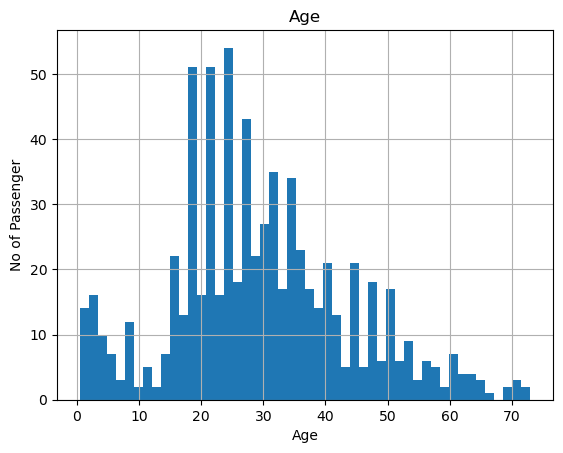

In [25]:
# histogram
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# Fare outlier 100
data.loc[data['Fare']>=100,'Fare']=100
# if fare amount greater than 100 , replace with 100

Text(0, 0.5, 'No of Passenger')

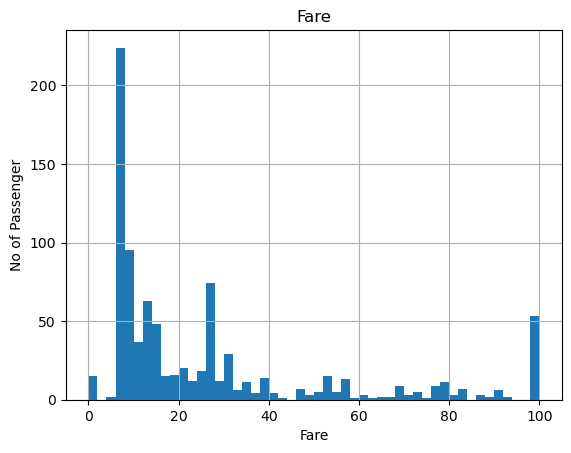

In [28]:
# histogram
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passenger')

In [29]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
# Apply Algorithm after removing the outliers
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)
# fill the nan value with 0

In [31]:
x_train.shape,x_test.shape

((623, 2), (268, 2))

In [32]:
## Logistics Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)



LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [34]:

y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

In [35]:
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))

Accuracy_score:0.664179104477612


In [36]:
print('roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

roc_auc_score:0.6759275489336839


In [37]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)


RandomForestClassifier()

In [38]:
from sklearn.metrics import accuracy_score,roc_auc_score
y_pred=classifier.predict(x_test)
y_pred1=classifier.predict_proba(x_test)

In [39]:
print('Accuracy_score:{}'.format(accuracy_score(y_test,y_pred)))

Accuracy_score:0.6492537313432836


In [40]:
print('roc_auc_score:{}'.format(roc_auc_score(y_test,y_pred1[:,1])))

roc_auc_score:0.6930762489044697
